In [14]:
# import libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [15]:
# read in final cleaned dataset
data = pd.read_csv("final_dataset.csv")
data.head()

,title,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,pop,rock,hip-hop,r&b,country,jazz,electronic,reggae,metal,folk
0,...baby one more time,britney spears,0.20200,0.759,0.699,0.000131,0.4430,-5.745,0.0307,92.960,...,1,0,0,0,0,0,1,1,0,0
1,doo wop (that thing),lauryn hill,0.03930,0.535,0.505,0.000000,0.0923,-8.926,0.2450,99.935,...,0,0,1,1,0,0,0,1,0,0
2,have you ever?,brandy,0.54200,0.698,0.533,0.000000,0.3330,-6.246,0.0437,134.001,...,1,0,0,1,0,0,0,0,0,0
3,love like this,faith evans,0.00364,0.767,0.551,0.000000,0.0451,-7.328,0.0616,100.904,...,0,0,1,1,0,0,0,0,0,0
4,this kiss,faith hill,0.17500,0.398,0.804,0.000000,0.1810,-5.559,0.0451,186.752,...,0,0,0,0,1,0,0,0,0,0


In [16]:
data.head()

,title,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,pop,rock,hip-hop,r&b,country,jazz,electronic,reggae,metal,folk
0,...baby one more time,britney spears,0.20200,0.759,0.699,0.000131,0.4430,-5.745,0.0307,92.960,...,1,0,0,0,0,0,1,1,0,0
1,doo wop (that thing),lauryn hill,0.03930,0.535,0.505,0.000000,0.0923,-8.926,0.2450,99.935,...,0,0,1,1,0,0,0,1,0,0
2,have you ever?,brandy,0.54200,0.698,0.533,0.000000,0.3330,-6.246,0.0437,134.001,...,1,0,0,1,0,0,0,0,0,0
3,love like this,faith evans,0.00364,0.767,0.551,0.000000,0.0451,-7.328,0.0616,100.904,...,0,0,1,1,0,0,0,0,0,0
4,this kiss,faith hill,0.17500,0.398,0.804,0.000000,0.1810,-5.559,0.0451,186.752,...,0,0,0,0,1,0,0,0,0,0


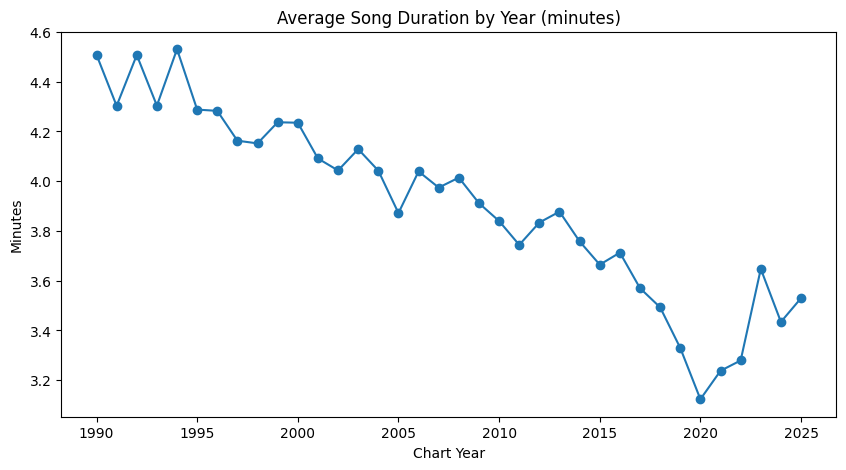

In [17]:
# line plot of average song duration per year
avg_year = data.groupby('chart_year')['duration_min'].mean().sort_index()

plt.figure(figsize=(10,5))
plt.plot(avg_year, marker='o')
plt.title("Average Song Duration by Year (minutes)")
plt.ylabel("Minutes")
plt.xlabel("Chart Year")
plt.show()

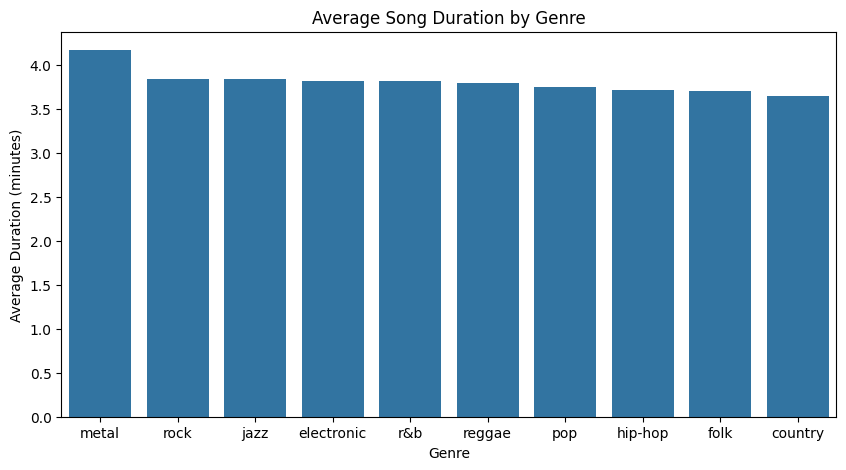

In [18]:
# List of genre columns
genre_cols = ['pop','rock','hip-hop','r&b','country','jazz','electronic','reggae','metal','folk']

# calculate average song duration per genre
avg_duration_genre = {}
for genre in genre_cols:
    avg_duration_genre[genre] = data.loc[data[genre] == 1, 'duration_min'].mean()

# convert to series for plotting
avg_duration_genre = pd.Series(avg_duration_genre).sort_values(ascending=False)

# bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=avg_duration_genre.index, y=avg_duration_genre.values)
plt.ylabel("Average Duration (minutes)")
plt.xlabel("Genre")
plt.title("Average Song Duration by Genre")
plt.show()

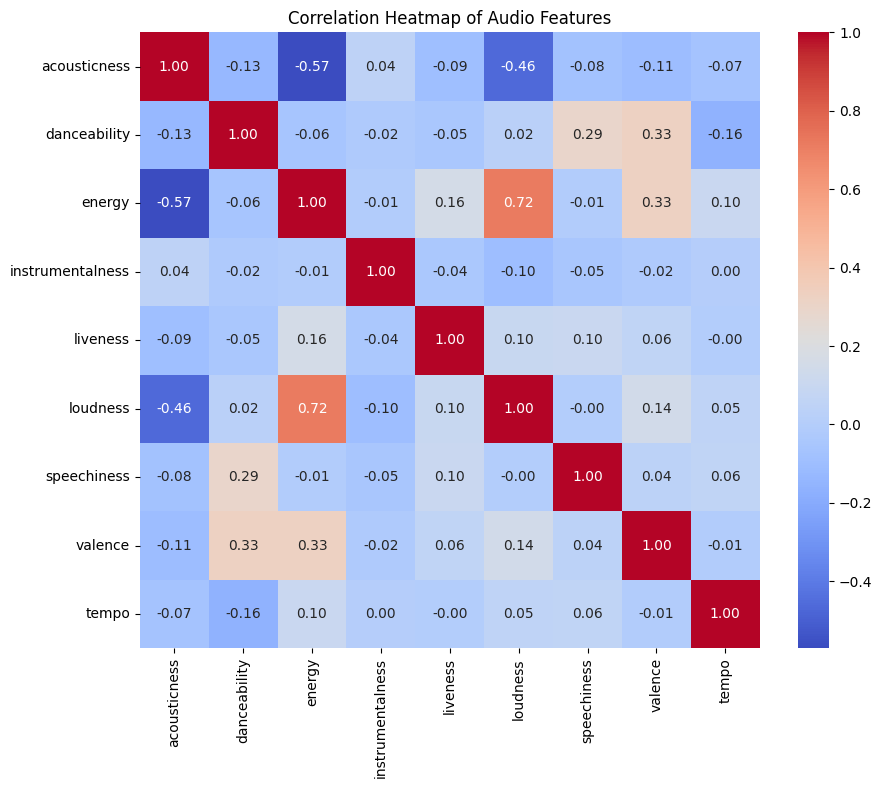

In [19]:
# List of audio feature columns
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

# compute correlation matrix
corr_matrix = data[audio_features].corr()

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

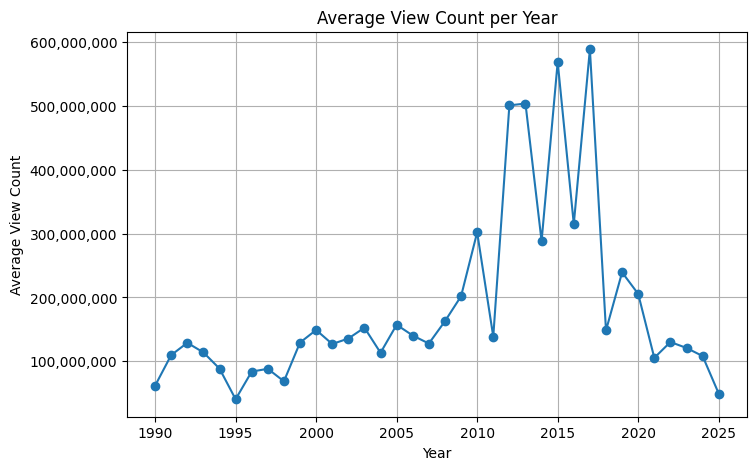

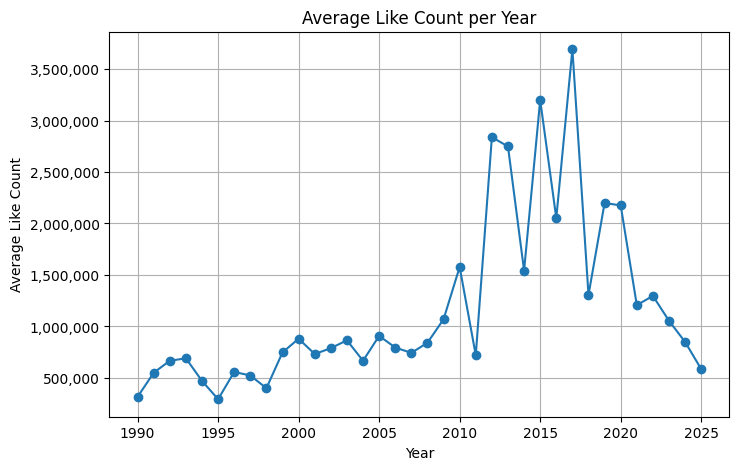

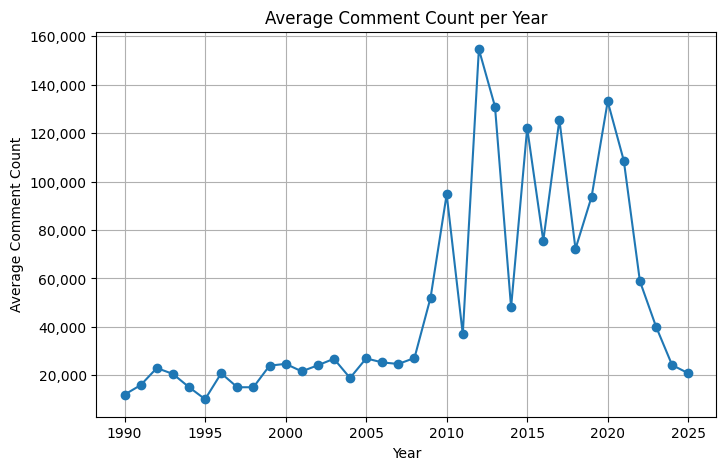

In [20]:
# average views per year
avg_views_per_year = data.groupby('chart_year')['view_count'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_views_per_year.index, avg_views_per_year.values, marker='o')
plt.title("Average View Count per Year")
plt.xlabel("Year")
plt.ylabel("Average View Count")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# average likes per year
avg_likes_per_year = data.groupby('chart_year')['like_count'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_likes_per_year.index, avg_likes_per_year.values, marker='o')
plt.title("Average Like Count per Year")
plt.xlabel("Year")
plt.ylabel("Average Like Count")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# average comments per year
avg_comments_per_year = data.groupby('chart_year')['comment_count'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_comments_per_year.index, avg_comments_per_year.values, marker='o')
plt.title("Average Comment Count per Year")
plt.xlabel("Year")
plt.ylabel("Average Comment Count")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

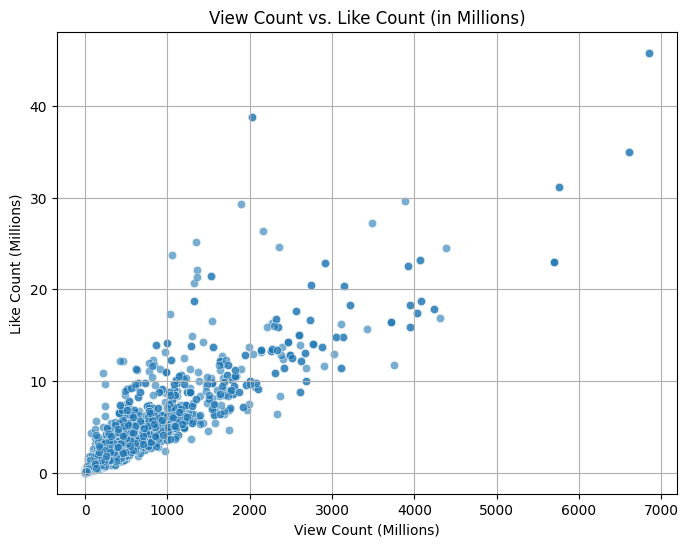

In [23]:
# create scaled columns (in thousands)
data['view_count_m'] = data['view_count'] / 1000000
data['like_count_m'] = data['like_count'] / 1000000

# scatter plot of view count vs. like count
plt.figure(figsize=(8,6))
sns.scatterplot(x='view_count_m', y='like_count_m', data=data, alpha=0.6)
plt.title("View Count vs. Like Count (in Millions)")
plt.xlabel("View Count (Millions)")
plt.ylabel("Like Count (Millions)")
plt.grid(True)
plt.show()